In [ ]:
!pip install nltk
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

  Using cached numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.0.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
langchain 0.3.11 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.0.2 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.0.2 which is incompatible.
pytensor 2.26.4 requires numpy<2,>=1.17.0, but you have numpy 2.0.2 which is incompa

In [ ]:
# Langkah 1: Pastikan versi NumPy kompatibel
!pip install numpy==1.24.4
!pip install --upgrade pyspark

# Langkah 2: Restart runtime setelah menjalankan di atas

# Langkah 3: Mulai ulang dan tambahkan patch jika diperlukan



  Using cached numpy-1.24.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.2 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.24.4 which is incompatible.


In [ ]:
import numpy as np
np.NaN = np.nan

from pyspark.sql import SparkSession
from pyspark import SparkFiles
import pyspark.pandas as ps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop = set(stopwords.words('english'))

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Buat sesi spark baru
spark = SparkSession.builder.master("local[*]")\
                            .appName("EDA")\
                            .getOrCreate()

spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

# tampilkan detail dari sesi spark
spark

In [ ]:
# Mengunduh file
!wget -O books.csv https://yudiantosujana.com/files/books/books.csv
!wget -O users.csv https://yudiantosujana.com/files/books/users.csv
!wget -O ratings.csv https://yudiantosujana.com/files/books/ratings.csv

--2024-12-15 03:34:38--  https://yudiantosujana.com/files/books/books.csv
Resolving yudiantosujana.com (yudiantosujana.com)... 103.157.146.146
Connecting to yudiantosujana.com (yudiantosujana.com)|103.157.146.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75082046 (72M) [text/csv]
Saving to: ‘books.csv’

books.csv           100%[===================>]  71.60M  8.01MB/s    in 9.7s    

2024-12-15 03:34:49 (7.36 MB/s) - ‘books.csv’ saved [75082046/75082046]

--2024-12-15 03:34:49--  https://yudiantosujana.com/files/books/users.csv
Resolving yudiantosujana.com (yudiantosujana.com)... 103.157.146.146
Connecting to yudiantosujana.com (yudiantosujana.com)|103.157.146.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12858335 (12M) [text/csv]
Saving to: ‘users.csv’

users.csv           100%[===================>]  12.26M  3.54MB/s    in 3.5s    

2024-12-15 03:34:54 (3.54 MB/s) - ‘users.csv’ saved [12858335/12858335]

--2024-12-15 03:34

In [ ]:
# Mengunduh data dari URL dan membaca CSV ke dalam DataFrame
books=pd.read_csv('https://yudiantosujana.com/files/books/books.csv', low_memory=False)
users=pd.read_csv('https://yudiantosujana.com/files/books/users.csv')
ratings=pd.read_csv('https://yudiantosujana.com/files/books/ratings.csv')

# Menampilkan beberapa baris pertama dari masing-masing DataFrame
print(books.head())
print(users.head())
print(ratings.head())

   Unnamed: 0        ISBN                                         Book-Title  \
0           0  0195153448                                Classical Mythology   
1           1  0002005018                                       Clara Callan   
2           2  0060973129                               Decision in Normandy   
3           3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4           4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://im

In [ ]:
# Cek nama kolom di masing-masing DataFrame
print("Books DataFrame Columns: ", books.columns)
print("Ratings DataFrame Columns: ", ratings.columns)
print("Users DataFrame Columns: ", users.columns)


Books DataFrame Columns:  Index(['Unnamed: 0', 'ISBN', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')
Ratings DataFrame Columns:  Index(['Unnamed: 0', 'User-ID', 'ISBN', 'Book-Rating'], dtype='object')
Users DataFrame Columns:  Index(['Unnamed: 0', 'User-ID', 'Location', 'Age'], dtype='object')


In [ ]:
# Menggabungkan ratings_df dengan books_df berdasarkan kolom 'ISBN'
merged_df = pd.merge(ratings, books, on='ISBN', how='left')

# Menampilkan beberapa baris pertama untuk memastikan hasil penggabungan
merged_df.head()

,Unnamed: 0_x,User-ID,ISBN,Book-Rating,Unnamed: 0_y,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0,276725,034545104X,0,2966.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,1,276726,0155061224,5,225816.0,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,2,276727,0446520802,0,11053.0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,3,276729,052165615X,3,246838.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,4,276729,0521795028,6,246839.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [ ]:
# Menggabungkan hasil penggabungan sebelumnya dengan users_df berdasarkan 'User-ID'
final_df = pd.merge(merged_df, users, on='User-ID', how='left')

# Menampilkan beberapa baris pertama dari hasil akhir
final_df.head()

,Unnamed: 0_x,User-ID,ISBN,Book-Rating,Unnamed: 0_y,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Unnamed: 0,Location,Age
0,0,276725,034545104X,0,2966.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,276724,"tyler, texas, usa",NaN
1,1,276726,0155061224,5,225816.0,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,276725,"seattle, washington, usa",NaN
2,2,276727,0446520802,0,11053.0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,276726,"h, new south wales, australia",16.0
3,3,276729,052165615X,3,246838.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,276728,"rijeka, n/a, croatia",16.0
4,4,276729,0521795028,6,246839.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,276728,"rijeka, n/a, croatia",16.0


In [ ]:
from pyspark import SparkFiles

# Menyimpan hasil penggabungan ke file CSV lokal
final_df.to_csv('/content/final_data.csv', index=False)

# Mengirimkan file ke Spark
spark.sparkContext.addFile('/content/final_data.csv')

# Membaca file CSV di Spark
df = pd.read_csv("file://"+SparkFiles.get('final_data.csv'))
df.head()

<ipython-input-14-e5cb3cab8513>:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("file://"+SparkFiles.get('final_data.csv'))


,Unnamed: 0_x,User-ID,ISBN,Book-Rating,Unnamed: 0_y,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Unnamed: 0,Location,Age
0,0,276725,034545104X,0,2966.0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,276724,"tyler, texas, usa",NaN
1,1,276726,0155061224,5,225816.0,Rites of Passage,Judith Rae,2001.0,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,276725,"seattle, washington, usa",NaN
2,2,276727,0446520802,0,11053.0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,276726,"h, new south wales, australia",16.0
3,3,276729,052165615X,3,246838.0,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,276728,"rijeka, n/a, croatia",16.0
4,4,276729,0521795028,6,246839.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,276728,"rijeka, n/a, croatia",16.0


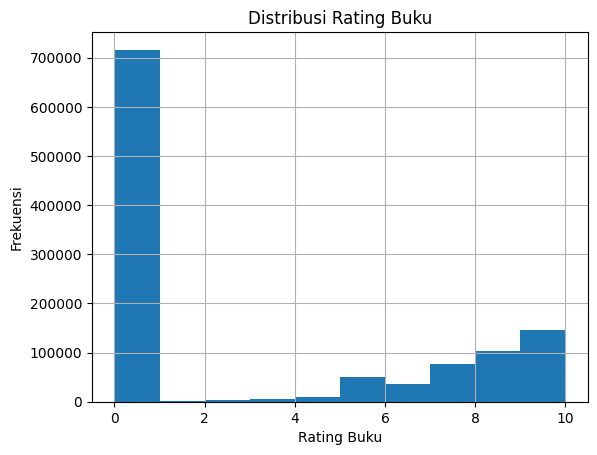

In [ ]:
# Menghitung distribusi rating buku dan membuat histogram
ratings['Book-Rating'].hist()

# Menambahkan label untuk sumbu X dan Y serta judul grafik untuk pemahaman yang lebih baik
plt.xlabel('Rating Buku')
plt.ylabel('Frekuensi')
plt.title('Distribusi Rating Buku')
plt.show()

In [ ]:
# Menghapus rating yang bernilai 0 atau NaN (Jika ada)
merged_df_filtered = merged_df[merged_df['Book-Rating'] > 0]

# Mengelompokkan berdasarkan ISBN dan menggabungkan judul buku
rating_sum_per_book = merged_df_filtered.groupby(['ISBN', 'Book-Title'])['Book-Rating'].sum().reset_index()

# Menampilkan hasil
print("Sum of ratings per category:")
print(rating_sum_per_book.head())

Sum of ratings per category:
         ISBN                                         Book-Title  Book-Rating
0  0000913154  The Way Things Work: An Illustrated Encycloped...            8
1  0001046438                                               Liar            9
2  000104687X  T.S. Eliot Reading \The Wasteland\" and Other ...            6
3  0001047213                                   The Fighting Man            9
4  0001047973                                    Brave New World           18


In [ ]:
# Menampilkan semua genre yang ada di kolom 'Genre'
unique_genres = merged_df['Genre'].unique()

# Menampilkan hasil
print("Daftar genre yang ada:")
print(unique_genres)

Daftar genre yang ada:
['Other' 'Romance' 'Thriller' 'Fantasy' 'Horror' 'Science Fiction']


In [ ]:
def identify_genre(book_title):
    # Pastikan book_title adalah string
    title = str(book_title).lower()  # Convert to string if it's not
    if "fantasy" in title or "wizard" in title or "magic" in title:
        return "Fantasy"
    elif "thriller" in title or "murder" in title or "mystery" in title:
        return "Thriller"
    elif "romance" in title or "love" in title:
        return "Romance"
    elif "science fiction" in title or "space" in title:
        return "Science Fiction"
    elif "horror" in title or "ghost" in title:
        return "Horror"
    else:
        return "Other"  # Jika tidak ada genre yang sesuai

# Pastikan tidak ada nilai NaN di kolom 'Book-Title'
merged_df['Book-Title'] = merged_df['Book-Title'].fillna('Unknown Book')

# Terapkan fungsi identify_genre pada setiap judul buku
merged_df['Genre'] = merged_df['Book-Title'].apply(identify_genre)

# Mengelompokkan berdasarkan genre dan menghitung total rating per genre
genre_rating = merged_df.groupby('Genre').agg(
    total_ratings=('Book-Rating', 'sum'),
    num_books=('ISBN', 'nunique')
).reset_index()

# Menampilkan genre berdasarkan total rating yang tertinggi dan terendah
genre_rating_sorted = genre_rating.sort_values(by='total_ratings', ascending=False)

# Menampilkan hasil
print("Sum of ratings per genre:")
print(genre_rating_sorted)

# Kesimpulan: Menampilkan genre yang paling diminati dan kurang diminati
max_rated_genre = genre_rating_sorted.iloc[0]
min_rated_genre = genre_rating_sorted.iloc[-1]

print("\nGenre paling diminati:", max_rated_genre['Genre'], "with total ratings:", max_rated_genre['total_ratings'])
print("Genre kurang diminati:", min_rated_genre['Genre'], "with total ratings:", min_rated_genre['total_ratings'])

Sum of ratings per genre:
             Genre  total_ratings  num_books
2            Other        3104940     317893
3          Romance          92724      11880
5         Thriller          55275       6029
0          Fantasy          25545       2484
1           Horror          10058       1259
4  Science Fiction           7820       1011

Genre paling diminati: Other with total ratings: 3104940
Genre kurang diminati: Science Fiction with total ratings: 7820


In [ ]:
# Menggabungkan data rating dengan data pengguna berdasarkan User-ID
merged_with_age = pd.merge(ratings, users[['User-ID', 'Age']], on='User-ID', how='left')

# Gabungkan dengan data buku berdasarkan ISBN
final_merged = pd.merge(merged_with_age, books[['ISBN', 'Book-Title']], on='ISBN', how='left')

In [ ]:
# Membuat grup berdasarkan umur dan menghitung jumlah rating per kelompok umur
age_rating_counts = final_merged.groupby('Age')['Book-Rating'].sum()

In [ ]:
# Menghapus umur yang tidak valid, misalnya lebih dari 100 tahun
final_merged = final_merged[final_merged['Age'] <= 100]

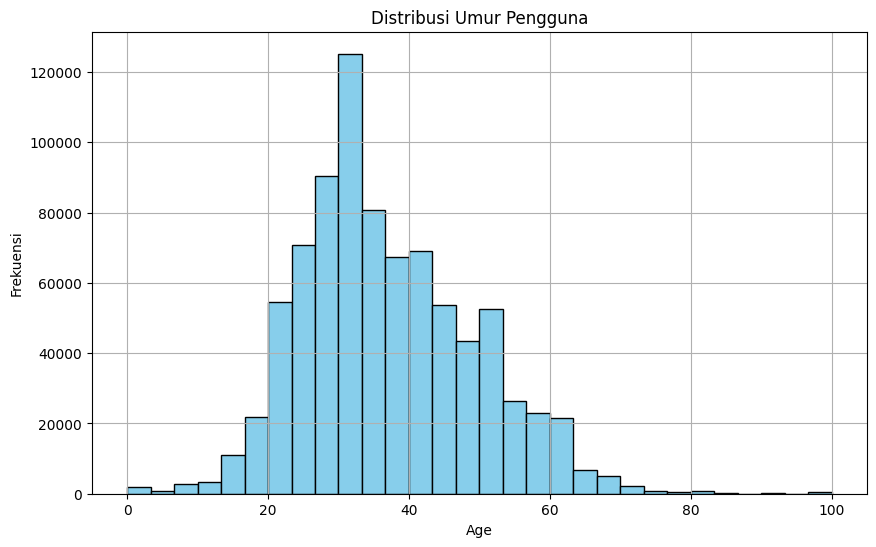

In [ ]:
# Membuat histogram distribusi umur pengguna
plt.figure(figsize=(10,6))
plt.hist(final_merged['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Umur Pengguna')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()